# Image Recognition using Convolutional Neural Network

# Table of contents
1. [Introduction](#introduction)
2. [Methodology: Data Collection, Data Visualization, Building Classifier Models, Evaluation, Prediction & Hyper Tuning the Model](#part2)

    2.1. [Data Collection, Data Visualization](#subparagraph1)
    
    2.2. [Data Preprocessing](#subparagraph2)
    
    2.3. [CNN Architecture](#subparagraph3)
    
    2.4. [Evaluations & Predictions](#subparagraph4)
    
    2.5. [Hyper tuning the CNN Classifier model](#subparagraph5)
    
3. [Conclusion](#conclusion)
4. [References](#references)

## **1. Introduction** <a name="introduction"></a>
Image recognition is a computing process to recognize people, animals, objects or other targeted subjects through the use of algorithms and deep learning concepts. Convolutional neural networks (abbreviated as “CNN”) have applications in computer vision like recognizing patterns in images, actions, emotions, faces and pictures or videos or even recognizing tumors in some brain images. CNN does this by categorizing images according to the objects included in them through a series of artificial neuron layers. The process of training computers to “see & recognize” like humans by doing intensive computing work on image data analyzing the facial features in images, in videos, or in real time the model gets better at identifying the subject of the picture.

Even though image recognition has benefits like identity checks in airports, identifying criminals, it is still a topic of a lot of controversy, debate and discussion in recent times citing intrusion into privacy and security threat. Social media platforms like Facebook & Google, new generation mobile phones etc. have been using image recognition extensively, carries risks so serious that they far outweigh any benefits. San Francisco has become the first US city to ban the use of facial recognition technology by the police and local government agencies. Just like our brain often times mistakenly categorizes objects at first sight, convolutional neural networks are prone to the same indecision when presented with an object or an image from an angle that can easily place it under more than one category. 

My goal in this article is to address precisely the application of convolutional neural network in the recognition of images of country maps making use of classifier model generated from a Convolutional Neural Network using Keras with TensorFlow backend based on a set of training data of images of France & US country maps obtained from Google search results. The models are then tested & evaluated on a test set to compare the accuracy & reduction in error rate achieved. Eventually, the best model is exploited to recognize the country present in images not yet seen by the model. 

## **2. Methodology: Data Collection, Data Visualization, Building Classifier Models, Evaluation, Prediction & Hyper Tuning the Model** <a name="part2"></a>
### **2.1 Data Collection & Visualization of Data** <a name="subparagraph1"></a>
The images are collected from Google search images for France & US maps. The dataset comprising of 1200 images of France & USA maps are color and have different shapes and sizes; some images are landscape format, some are portrait format, and some are square. The training set has 1000 images and the test set has 200 images. These images can be visualized by loading and plotting some random images of France & USA with the help of matplotlib.

Using TensorFlow backend.


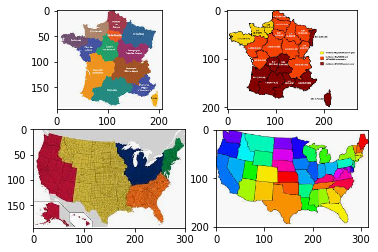

In [1]:
from keras.preprocessing import image
train_image1 = image.load_img('Countries/trainsets/France/France (1).jpg')
train_image2 = image.load_img('Countries/trainsets/France/France (500).jpg')
train_image3 = image.load_img('Countries/trainsets/USA/USA (10).jpg')
train_image4 = image.load_img('Countries/trainsets/USA/USA (271).jpg')
import matplotlib.pyplot as plt
%matplotlib inline 
# plot 6 images as gray scale
plt.subplot(221)
plt.imshow(train_image1)
plt.subplot(222)
plt.imshow(train_image2)
plt.subplot(223)
plt.imshow(train_image3)
plt.subplot(224)
plt.imshow(train_image4)

# show the plot
plt.show()

### **2.2 Data Preprocessing** <a name="subparagraph2"></a>
Data preprocessing will be done in one step using Image augmentation shortcut which basically consists of pre-processing the images to prevent overfitting. Image data generator is the first function to use to generate the image augmentation. One of the situations that lead to overfitting is when only few data to train the model is available and in that situation the model finds some correlations in the few observations of the trainset but fails to generalize these correlations on some new observations. And when it comes to images a lot of images are required to find and generalize some correlations because in computer vision or machine learning a model doesn't simply need to find some correlations between some independent variables and some dependent variables. It needs to find some patterns in the pixels and to do this it requires a lot of images.

The working directory has a total of 1200 images; 1000 images on the training sets and that is actually not much to get some great performance results. Data augmentation increases the number of images by creating  many batches of  images and then to each batch it will apply some random transformations on a random selection of our image just like rotating them, flipping them, shifting them, or even shearing them to generate many more diverse images inside these batches and therefore a lot more material to train. Because the transformations are random transformations same picture across the batches are never found and thus reduce overfitting. In summary image augmentation is a technique that to enrich the training set without adding more images and therefore to get good performance results with little or no overfitting even with a small number of images. 

ImageDataGenerator class from Keras allows the users to perform image augmentation in a very easy way. The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images. For the present study, I am going to use flow_from_directory() method. For this I have downloaded the data from Google images, renamed and divided them into 2 different folders the train dataset and test dataset, named as “trainset” and “testset”. Each folder contains 2 subfolders containing images of both classes, “France” and “USA”. Thus for the “Countries” data set, the train folder has 2 subfolders, namely “France” and “USA” each containing 500 respective images inside them. Similarly, the testset contains 100 respective images of “France” & “USA”. The directory structure for Countries dataset binary classification problem is as given below:

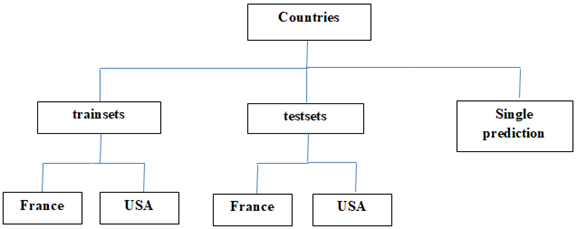

flow_from_directory() method preprocess the images, augment them and even fit the convolutional neural network classifier model on images. The fit generator method will not only fit the CNN to the training set but it will also test at the same time its performance on some new observations which are going to be the observations of the test set, ie., the images of the ‘testset’ folder. The ImageDataGenerator applies several transformations like the rescale and it corresponds to the features part of the data processing. shear_range is for shearing which is a geometrical transformation that is also called transvection, where the pixels are moved to a fixed direction over a proportional distance from a line that is parallel to the direction they're moving to. And then there are some other kinds of transformations like zoom range, which is some sort of random zoom that is applied on the images. Horizontal flip flips horizontally the images. A vertical flip is not used here.  This ImageDataGenerator part is applied on the trainset. The ImageDataGenerator on the images of test set is used only to rescale. The training set and the test set are created separately from the two ImageDataGenerator methods. This training set will be composed of all the augmented images extracted from ImageDataGenerator. The rescaled test sets extracted from ImageDataGenerator will be used to evaluate the model performance. 

train_datagen is the variable chosen for train set ImageDataGenerator class. The parameters selected are listed below:
    
    •	By rescaling them using this rescale = 1 / 255, all pixel values will be between zero and one. For images, the information about colors is given in terms of pixels and 1 byte is used for each pixel. One byte contains 8 bits, each of which can take the value of 1 or 0. Since computers understand nothing but 1's and 0's, the colors' numerical values are represented to the network in binary terms. So the maximum number of combinations possible is 256 (2^8). Hence two-dimensional black & white images will be represented in the scale 0 to 255 where 0 is pitch black and 255 is pure white and in between are various shades of grey. Similarly the red layer is represented with a number between 0 and 255, and so are the blue and the green layers. They are then presented in an RGB format. For example, a "Lemon Yellow" pixel would be presented to the neural network as (255, 244, 79).
    
    •	shear_range to apply random transvections, 
    
    •	zoom_range, to apply some random zooms will be kept at 0.2 value 
    
    •	horizontal_flip, is kept True. This will generate enough transformations so that the same image will not be found in the different batches. 

test_datagen, need to rescale the pixels of the images of the test set, so that they have values between zero and one. 

The dataset that is composed of two set folders, the trainset and the testset, and therefore the paths need to be specified, that is, training_set & test_set. 
    
    •	To input the dataset the path of the train set ‘Countries/trainset’ is entered. 
    
    •	target_size is the size of input images  that is expected in the CNN model, every image will be resized to this size. A 64 by 64 dimension for images are chosen. 
    
    •	batch_size contains the number of images that will go through the CNN, after which the weight will be updated and 32 is chosen for that. 
    
    •	Finally, class_mode is the parameter indicating whether the dependent variable  class is binary or has more than two categories, and therefore since the dataset contains two classes here, ‘France’ and ‘USA’, the class_mode is binary. 
    
    •	Similarly for test set, test_set variable is chosen, and this code section will create the test set exactly same as train generator settings except for obvious changes like directory path. The path that lead to the test set is specified, 'Countries/testset'. The rest of the parameters are entered as done for train set.


### **2.3 CNN Architecture** <a name="subparagraph3"></a>
The model is initialized by creating an object of the sequential class. CNN building process takes four steps. Step one, Convolution; step two, Max Pooling, step three, Flattening and step four, Full Connection. Layers can be added in between each of these steps to tune the model to achieve the best accuracy possible. 
#### **Part 1 - Building CNN Classifier model**

**_First Layer: The Input Layer_**
The input layer is preprocessed 64x64 sized RGB image dataset. 

**_Second Layer: The first hidden layer - Convolution_**
The first hidden layer of the network is going to perform some convolutions scanning over the input image using 32 distinct filters (also known as feature detectors or neurons or convolution kernel). The feature detectors will be 3x3 dimensions in size with 1x1 stride (1 pixel shift at each step). Convolving a 3x3 filter with a 64x64 pixel image yields a 64x64x32 filtered image, called feature map. The feature map contains some numbers and the highest numbers of the feature map is where the feature detector could detect a specific feature in the input image. This operation here between the input image and the feature detector that results in the future map, is the convolution operation and is done using Convolution2D function. 
    
    •	The first argument is filters, the number of filters or the number of feature detectors; working on a CPU, I am limiting the number to 32. This is exactly the number of feature detectors that I’m going to apply on the input image to get this same number of feature maps because there will be one feature map created for each filter used. 
    
    •	The second argument is the dimensions of the feature detector used (3x3). 
    
    •	The third argument Padding = same is set to overcome shrinking of outputs and to avoid losing information on corners of the image. Padding is an additional layer that can be added to the border of an image so as to have more frames that cover the edge pixels of an image. More information is gathered and hence more accuracy.  
    
    •	The fourth argument is input_shape, the shape of the input image on which I am going to apply the feature detectors through the convolution operation and this converts all images into one fixed size of the image. Input images are converted into 3D arrays, if the image is a colored image and into 2D arrays if the image is a black-and-white image. Since here colored images are involved, they will be converted into 3D arrays during the image pre-processing part and it is composed of three channels, each channel corresponding to one color, blue green or red, and each channel corresponds to one 2D array that contains the pixels of the images. input_shape has two arguments, input_size, and the number of channels, which will only be one when dealing with a black and white image or three  for colored images.  Colored images are represented in three dimensional information (RGB), but Black and white images need only two dimensional information. Hence for black and white images each pixel needs only a single layer. On the other hand, each pixel inside a colored image is represented on three levels. Since any color is a combination of red, green, and blue at different levels of concentration, a single pixel in a colored image is assigned a separate value for each of these layers.  And therefore three channels are configured to  keep these information related to the colors. input_size is the dimensions of the 2D array in each of the channel. (64x64) dimensional format is normally chosen for working on a CPU to avoid waiting too many hours before the code finishes to execute. This will be good enough to get some good accuracy results. 
    
    •	Finally, the well performed “rectifier linear unit (relu)” is taken as the activation function.
These 32 convolutions with 3x3 feature detectors will generate 32 separate output maps, with a 64x64x32 matrix as the output of layer 2. 

**_Third Layer: Second hidden layer- Max pooling_**
Pooling step just consists of reducing the size of convoluted feature maps. This is done by sliding a 2x2 dimension square table over the feature map with a stride of two to take the maximum of the four cells.  The size of the original feature map is divided by two when max pooling is applied. This has the effect of subsampling the output maps by a factor of 2 in both dimensions, so we get a 32x32x32 matrix pooling layer. This is to reduce the number of nodes for the next step, that is the Flattening step and then the Full Connection step because in these next steps basically the outcome is all the cells of feature maps, flattened in one huge one-dimensional vector. So, if the size of these feature maps is not reduced, the outcome will be a too large vector and then too many nodes in the fully connected layers and therefore the model will become highly compute-intensive. To avoid this max pooling is applied to reduce the size of feature maps and therefore to reduce the number of nodes in the future fully connected layers reducing the complexity and the time execution but without the losing the performance of the model. 
The max pooling is done using MaxPooling2D function with a pool size of two-by-two dimensions. 

**_Fourth Layer: Second convolution layer_**
The fourth layer is another convolution layer. Here also the model is configured with 32 distinct filters with a kernel size of 3x3, to contain 32 neurons. The output of third layer has a depth of 32. A single neuron in the fourth layer is going to be connected to all 32 pooled maps from the third layer. One way to think about how this is controlled is to say that the fourth layer filters have a size of 32x3x3. That is, each filter in the fourth layer has 800 unique weight values in it. In the code, however, convolutions are only done with two-dimensional filters. Instead of having 32 32x3x3 filters, the model has 1024 1x3x3 filters. For each of the 32 fourth layer filters, there are 32 separate 1x3x3 kernels. To apply a single fourth layer filter, 32 convolutions (one for each output map in the third layer) are performed, and then sum up all of the resulting maps to make a single 1x32x32 output map for that filter. This is done for each of the 32 filters to create the 32x32x32 output of the fourth layer.

**_Fifth Layer:  Second Max pooling_** operation that’s identical to the one in the third layer is executed, subsampling by a factor of 2 in each dimension to generate the 16x16x32 output of the fifth layer.

**_Sixth Layer: Third Convolution_** configured with 5x5dimensional 32 filters with output 16x16x32

**_Seventh Layer: Third Max pooling_** with 2x2 dimensions generates 8x8x32 output

**_Eight Layer: Fourth Convolution_** configured with 3x3 dimensional 32 filters generates 8x8x32 output

**_Ninth Layer: Fourth Max pooling_** with 2x2 dimensions generates 4x4x32 output

**_Tenth Layer: Dropout_** To tackle overfitting, dropout regularization is applied to the neurons so that 20% of them randomly become disabled at each iteration. 

**_Eleventh Layer: Flattening_** This layer consists of taking all the pooled feature maps and put them into one single huge one dimensional vector containing 512 values (4x4x32 = 512) by applying the Flatten step. 

**_Twelfth Layer: The full connection Dense 1_** - output_dim parameter which is the number of nodes in the hidden layer is taken as 128 along with the ‘rectifier linear(relu)’ activation function. 
output_dim parameter which is the number of nodes in the hidden layer is taken as 128 along with the ‘rectifier linear(relu)’ activation function. 

**_Thirteenth Layer: The full connection Dense 2_** - output_dim parameter takes the value as 50 along with the ‘rectifier linear(relu)’ activation function. 

**_Fourteenth layer: Batch Normalization_**
Batch Normalization is a mechanism proposed by Ioffe & Szegedy, to reduce internal covariate shift via a normalization step that fixes the means and variances of layer inputs, and thus dramatically accelerates the training of deep neural nets. Batch Normalization also has a beneficial effect on the gradient flow through the network, by reducing the dependence of gradients on the scale of the parameters or of their initial values. This allows using much higher learning rates without the risk of divergence. Furthermore, batch normalization regularizes the model and reduces the need for Dropout.  If a model learned some X to Y mapping, and if the pixel distribution of X changes, then the model needs to be retrained by trying to align the new distribution of X with that of Y. When Batch normalization is applied it allows each layer of the model to learn by itself a little bit more independently of other layers. Finally, Batch Normalization makes it possible to use saturating nonlinearities by preventing the network from getting stuck in the saturated modes.

**_Fifteenth layer: The output layer_** The output layer is configured with Sigmoid activation function for binary classification problem and 1 output units corresponding to the predicted probability of one class, and this class can be France or USA.

**_Compilation of the model_**
Before training a model, the learning process needs to be configured, which is done via the compile method using logarithmic loss 'binary_crossentropy'  for a binary outcome and the ‘adam’ gradient descent optimizer. Like any classification problem, ‘accuracy’ is chosen as the metric. 

#### **Part 2 - Fitting the CNN to the images**
The architecture of convolutional neural network is designed and now beginning part two in which to fit the CNN to the images. To fit the CNN classifier model to the training set and also to test its performance on the test set, fit_generator, is used. The first argument is training set, the second arguments is the ‘steps_per_epoch’ which is simply the number of images in the training set. ‘epochs’, is the number of epochs to train the CNN  and validation data corresponds to the test set by which the performance of the CNN model is evaluated. The last parameter is validation_steps, and that corresponds to the number of images in the test set, and that is 200. 

In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

input_size = (64,64)
training_set = train_datagen.flow_from_directory('Countries/trainsets',
                                                 target_size = (input_size),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Countries/testsets',
                                            target_size = (input_size),
                                            batch_size = 32,
                                            class_mode = 'binary')

# Part 1 - Building CNN Classifier model
def build_classifier():
    classifier = Sequential() 
    classifier.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(*input_size,3), activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(32,(3,3), padding='same', activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Flatten())
    classifier.add(Dropout(0.2))
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(Dense(activation = 'relu', units = 50))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'sigmoid', units = 1))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Part 2 - Fitting the CNN to the images
classifier = build_classifier()
classifier_history = classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 200)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
1000/1000 [==============================] - 508s 508ms/step - loss: 0.2797 - acc: 0.8749 - val_loss: 0.0660 - val_acc: 0.9700
Epoch 2/25
1000/1000 [==============================] - 531s 531ms/step - loss: 0.1041 - acc: 0.9605 - val_loss: 0.0819 - val_acc: 0.9702
Epoch 3/25
1000/1000 [==============================] - 538s 538ms/step - loss: 0.0691 - acc: 0.9756 - val_loss: 0.1340 - val_acc: 0.9495
Epoch 4/25
1000/1000 [==============================] - 537s 537ms/step - loss: 0.0424 - acc: 0.9845 - val_loss: 0.0576 - val_acc: 0.9751
Epoch 5/25
1000/1000 [==============================] - 531s 531ms/step - loss: 0.0389 - acc: 0.9868 - val_loss: 0.0645 - val_acc:

In [3]:
import os
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
__________

### **2.4 Evaluation & Predictions** <a name="subparagraph4"></a>

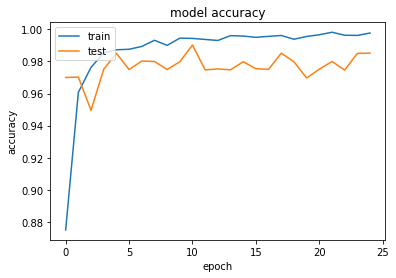

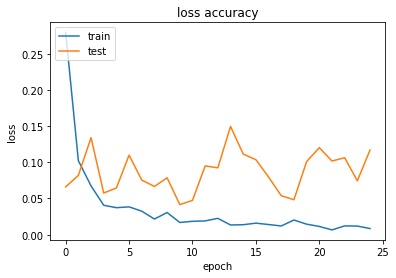

The model class indices are: {'France': 0, 'USA': 1}


In [4]:
# Evaluate CNN model
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(classifier_history.history['acc'])
plt.plot(classifier_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("The model class indices are:", training_set.class_indices)

In [ ]:
# Evaluate CNN model
_, acc = classifier.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("acc: %.2f%%" % (acc*100))

acc: 98.50%


The classifier model achieved 99.7% accuracy on the training set and 98.5% on test set. The difference between the accuracy of the training set and the accuracy of the test set is very minute and hence no over-fitting at all. 98.5% accuracy means that 98.5 correct predictions out of 100, which is also remarkable. 

#### **Part 3 - Making new predictions**
The evaluated model is now ready to predict unknown images present in a different sub-folder in the data set folder called Single Prediction. The image is imported by the load image function by Keras & pre-processed by a function in numpy, so that it can be accepted by the predict method. 
   
    •	The load_img function specifies the file path & the target size of 64x 64 dimensional formats which was used earlier for the training set images should be entered for new images as well. 
    
    •	The image to array (img_to_array) function will be utilized to create the third dimensional array that will have the same format as the input shape in the input layer of our CNN. This function modifies the test image variable from being an image of two dimensions to a three dimensional array. 
    
    •	Convolution 2D is expected to have four dimensions; so to add a new dimension to the array with shape 64x64x3 expand_dims function from numpy is called for. The first argument is the test image to be expanded by adding a new dimension, and the second argument is axis to specify the position of the index of the dimension that is going to be added. The dimension needs to be added in the first position as per the predict method and therefore axis should be kept as zero to have the first index, that is index zero. Now the test image is expanded from three dimensions, 64x64x3 to get four dimensions, 1x64x64x3.
    
    •	A new variable prediction which will contain the final result in text  is created and states that if the result is one, then the prediction is going to be the string USA, else, the prediction is going to be equal to the string France, because the model class indices are: {'France': 0, 'USA': 1}.


France


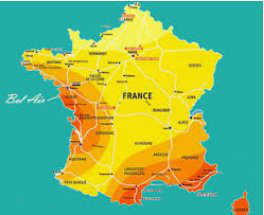

In [ ]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('Countries/Single Prediction/France.jpg')
test_image = image.load_img('Countries/Single Prediction/France.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1:
    prediction = 'USA'
else:
    prediction = 'France'
print(prediction)
test_image1

USA


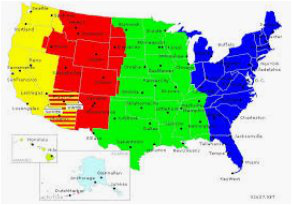

In [ ]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image2 = image.load_img('Countries/Single Prediction/USA.jpg')
test_image = image.load_img('Countries/Single Prediction/USA.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
if result[0][0] == 1:
    prediction = 'USA'
else:
    prediction = 'France'
print(prediction)
test_image2

The model has correctly identified the two images as France & USA. 

### **2.5 Hyper tuning the CNN Classifier model** <a name="subparagraph5"></a>
To increase the accuracy of the test set over 98.5%, and decrease the difference between training set and test set accuracy the CNN model can be tuned by changing parameters like optimizers, number of filters etc. 

**_First Layer:_** The Input Layer

**_Second Layer:_** First Convolution configured with 3x3 dimensional 32 filters 

**_Third Layer:_**  First Max pooling 2x2 dimensions

**_Fourth Layer:_** Second Convolution configured with 3x3 dimensional 32 filters

**_Fifth Layer:_** Second Max pooling 2x2

**_Sixth Layer:_** Third Convolution configured with 3x3 dimensional 64 filters

**_Seventh Layer:_** Third Max pooling with 2x2 dimensions

**_Eighth Layer:_**  Fourth Convolution configured with 3x3 dimensional 128 filters

**_Ninth Layer:_** Fourth Max pooling with 2x2 dimensions

**_Tenth Layer:_** Flattening

**_Eleventh Layer:_** Dropout

**_Twelfth Layer:_** The full connection Dense 1 

**_Thirteenth Layer:_** The full connection Dense 2

**_Fourteenth Layer:_** Batch Normalization

**_Fifteenth Layer:_** The output Dense 3

**_Compilation of the model_**
The ‘rmsprop’ optimizer is used instead of ‘adam’ gradient descent optimizer. The rest of the arguments are kept same as before. 

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Data preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

input_size = (64,64)
training_set = train_datagen.flow_from_directory('Countries/trainsets',
                                                 target_size = (input_size),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Countries/testsets',
                                            target_size = (input_size),
                                            batch_size = 32,
                                            class_mode = 'binary')
# Part 1 - Building CNN Classifier model
def build_classifier2():
    classifier = Sequential() 
    classifier.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(*input_size,3), activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(32,(3,3), padding='same', activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    classifier.add(MaxPooling2D((2,2)))
    classifier.add(Flatten())
    classifier.add(Dropout(0.2))
    classifier.add(Dense(activation = 'relu', units = 128))
    classifier.add(Dense(activation = 'relu', units = 50))
    classifier.add(BatchNormalization())
    classifier.add(Dense(activation = 'sigmoid', units = 1))
    classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Part 2 - Fitting the CNN to the images
classifier2 = build_classifier2()
classifier2_history = classifier2.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 12,
                         validation_data = test_set,
                         validation_steps = 200)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/12
1000/1000 [==============================] - 731s 731ms/step - loss: 0.2004 - acc: 0.9130 - val_loss: 0.1045 - val_acc: 0.9749
Epoch 2/12
1000/1000 [==============================] - 749s 749ms/step - loss: 0.0637 - acc: 0.9769 - val_loss: 0.0885 - val_acc: 0.9749
Epoch 3/12
1000/1000 [==============================] - 772s 772ms/step - loss: 0.0418 - acc: 0.9858 - val_loss: 0.1448 - val_acc: 0.9700
Epoch 4/12
1000/1000 [==============================] - 759s 759ms/step - loss: 0.0280 - acc: 0.9908 - val_loss: 0.1023 - val_acc: 0.9705
Epoch 5/12
1000/1000 [==============================] - 768s 768ms/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.1947 - val_acc:

In [9]:
import os
classifier2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

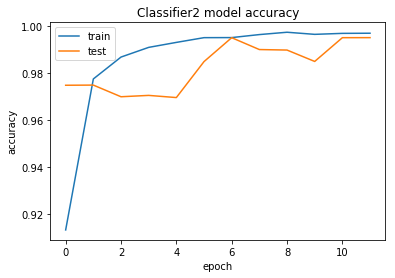

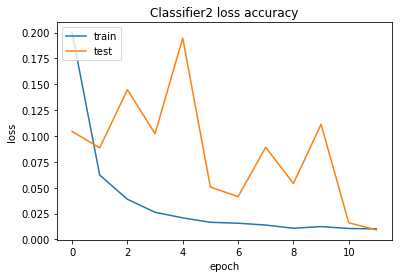

The model class indices are: {'France': 0, 'USA': 1}


In [10]:
# Evaluate CNN model
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(classifier2_history.history['acc'])
plt.plot(classifier2_history.history['val_acc'])
plt.title('Classifier2 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
plt.plot(classifier2_history.history['loss'])
plt.plot(classifier2_history.history['val_loss'])
plt.title('Classifier2 loss accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print("The model class indices are:", training_set.class_indices)

France


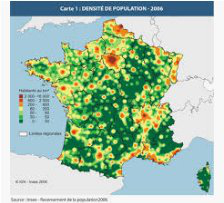

In [12]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('Countries/Single Prediction/France 2.jpg')
test_image = image.load_img('Countries/Single Prediction/France 2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'USA'
else:
    prediction = 'France'
print(prediction)
test_image1

USA


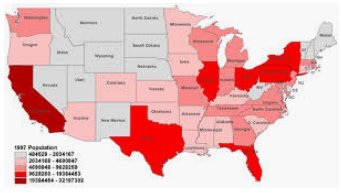

In [13]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image2 = image.load_img('Countries/Single Prediction/USA 2.jpg')
test_image = image.load_img('Countries/Single Prediction/USA 2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier2.predict(test_image)
if result[0][0] == 1:
    prediction = 'USA'
else:
    prediction = 'France'
print(prediction)
test_image2

In [14]:
# evaluate model
_, train_acc = classifier2.evaluate_generator(training_set, steps=len(training_set), verbose=0)
_, acc = classifier2.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("training acc: %.2f%%" % (train_acc*100))
print("testing acc: %.2f%%" % (acc*100))

training acc: 100.00%
testing acc: 99.50%


The model has reached an exceptional test set accuracy of 99.5% by changing the number of filters to 64 and 128 for the third and fourth convolutional layers and also by switching commonly used ‘adam’ optimizer to ‘rmsprop’ instead. 

## **3. Conclusion** <a name="conclusion"></a>

Two classifier models are built employing 4 convolutional layers, 4 max pooling, 1 drop out, 2 full connection hidden neural network layers and 1 Batch Normalization. For the first classifier 32 filters are chosen for all four convolutional layers, whereas for the second model 32, 32, 64, 128 filters are employed. First model is configured using ‘adam’ optimizer, and achieved an accuracy of 98.5% on test set. The second model is compiled using ‘rmsprop’ optimizer, accomplishing an outstanding test set accuracy of 99.5% 


## **4. References** <a name="references"></a>
•	The Ultimate Guide to Convolutional Neural Networks https://www.superdatascience.com/blogs/the-ultimate-guide-to-convolutional-neural-networks-cnn

•	Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift https://arxiv.org/pdf/1502.03167v3.pdf

•	How to Develop a Convolutional Neural Network to Classify Photos of Dogs and Cats (with 97% accuracy) https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/